In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Now we need to read in the data
data_frame = pd.read_csv(r'C:\Users\zygophythewhale267\Documents\Portfolio_Projects\Data_Analyst_Projects\delhiaqi.csv')
data_frame.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [3]:
#Data cleaning
#Converting the date column in the dataset into a datetime data type for easier read
data_frame['date'] = pd.to_datetime(data_frame['date'])
#Looking at the statistical descriptive data from the data set
print(data_frame.describe())

                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  
count   561.000000   561.000000  561.000000  
mean    358.256364   420.988414   26.425062  
std     227.359117   271.287026   36.563094  
min      60.100000    69.080000    0.630000  
25%     204.450000   240.900000    8.230000  
50%     301.170000   340.900000   14.820000  
75%     416.650000   482.570000   26.3

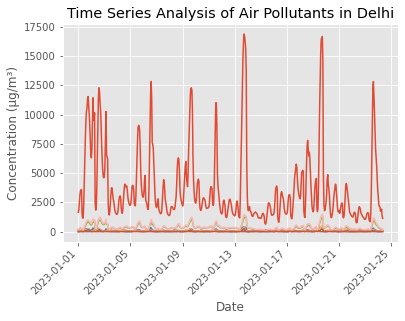

In [7]:
#looking at the intensity of each pollutant over time in the air quality:
#The time series plot for each air pollutant
plt.plot(data_frame['date'], data_frame['co'])
plt.plot(data_frame['date'], data_frame['no'])
plt.plot(data_frame['date'], data_frame['no2'])
plt.plot(data_frame['date'], data_frame['o3'])
plt.plot(data_frame['date'], data_frame['so2'])
plt.plot(data_frame['date'], data_frame['pm2_5'])
plt.plot(data_frame['date'], data_frame['pm10'])
plt.plot(data_frame['date'], data_frame['nh3'])

plt.title('Time Series Analysis of Air Pollutants in Delhi')
plt.xlabel("Date")
plt.ylabel('Concentration (µg/m³)')
# rotating the x-axis tick labels at 45degree 
# towards right
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]
#calculate_aqi: to calculate the AQI for a specific pollutant and concentration by finding the appropriate range in the aqi_breakpoints
def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None
#calculate_overall_aqi: to calculate the overall AQI for a row in the dataset by considering the maximum AQI value among all pollutants
def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
data_frame['AQI'] = data_frame.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
#The calculated AQI values are added as a new column in the dataset. Additionally, i defined AQI categories in the aqi_categories list and used the categorize_aqi function to assign an AQI category to each AQI value. The resulting AQI categories are added as a new column as AQI Category in the dataset
data_frame['AQI Category'] = data_frame['AQI'].apply(categorize_aqi)
print(data_frame.head())

                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  AQI    AQI Category  
0   5.83  300  Very Unhealthy  
1   7.66  300  Very Unhealthy  
2  11.40  400       Hazardous  
3  13.55  400       Hazardous  
4  14.19  400       Hazardous  


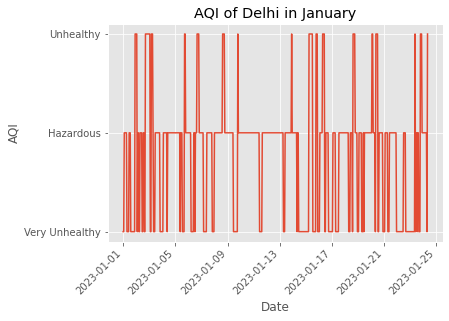

In [10]:
#Analyzing AQI of Delhi
# AQI over time
plt.plot(data_frame['date'], data_frame['AQI Category'])
plt.title('AQI of Delhi in January')
plt.xlabel("Date")
plt.ylabel('AQI')
# rotating the x-axis tick labels at 45degree 
# towards right
plt.xticks(rotation=45, ha='right')
plt.show()

In [3]:
# Define pollutants and their colors

# Calculate the sum of pollutant concentrations
#total_concentrations = data_frame[pollutants].sum()

# Create a DataFrame for the concentrations
#concentration_data = pd.DataFrame({
    #"Pollutant": pollutants,
    #"Concentration": total_concentrations
#})
print(data_frame.head())

NameError: name 'data_frame' is not defined